In [1]:
#Import des librairies
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')




In [2]:
#Scraping de données
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('today')

df_stock = web.DataReader('AAPL', data_source='yahoo', start=start, end=end)
df_vix = web.DataReader('^VIX', data_source='yahoo', start=start, end=end)


In [3]:
# Taille des données
print(df_stock.shape)
print(df_vix.shape)

(2251, 6)
(2251, 6)


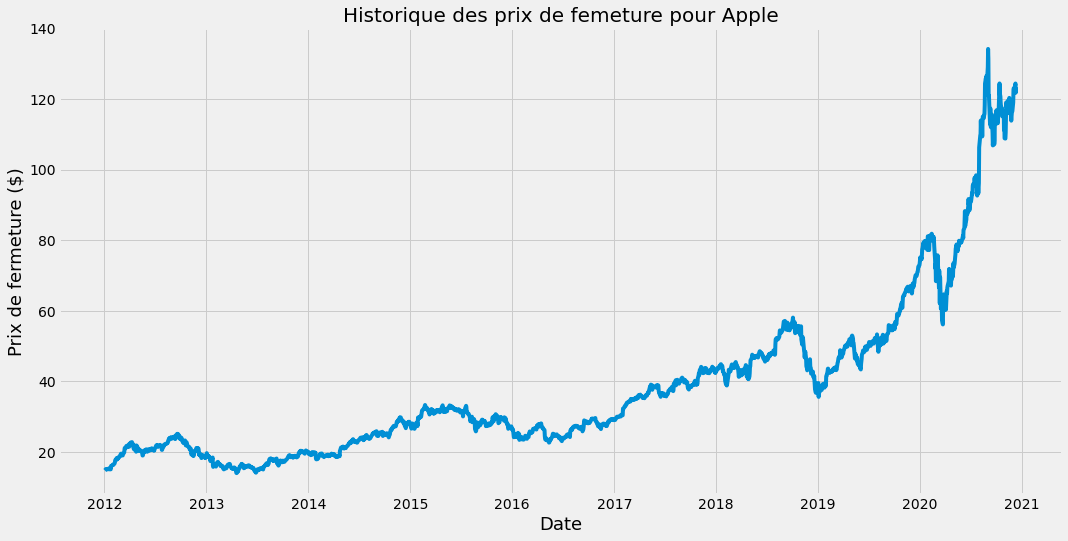

In [4]:
# Visualisation des prix de fermeture
plt.figure(figsize=(16,8))
plt.title('Historique des prix de femeture pour Apple', fontsize=20)
plt.plot(df_stock['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Prix de fermeture ($)', fontsize=18)
plt.show()

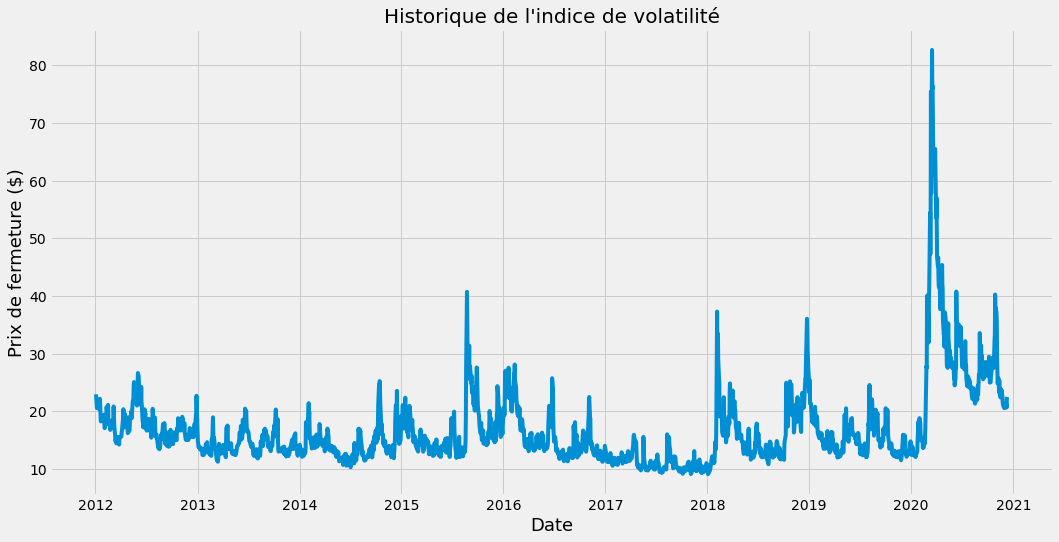

In [5]:
# Visualisation du VIX
plt.figure(figsize=(16,8))
plt.title("Historique de l'indice de volatilité", fontsize=20)
plt.plot(df_vix['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Prix de fermeture ($)', fontsize=18)
plt.show()

In [6]:
#On ne s'intéresse qu'aux prix de fermeture
data_stock = df_stock.filter(['Close'])
data_vix = df_vix.filter(['Close'])

#On convertit les données en numpy array
dataset_stock = data_stock.values
dataset_vix = data_vix.values
#Taille des données d'entraînement
training_data_len = int(len(dataset_stock) * 0.8)
training_data_len


1800

In [7]:
#Normalisation des données
scaler_stock = MinMaxScaler(feature_range=(0,1))
scaled_stock = scaler_stock.fit_transform(dataset_stock)

scaler_vix = MinMaxScaler(feature_range=(0,1))
scaled_vix = scaler_vix.fit_transform(dataset_vix)

scaled_data=np.concatenate((scaled_stock,scaled_vix),axis=1)

In [8]:
#Création des données d'entraînement
train_data = scaled_data[0:training_data_len, :]
#Création de X_train and y_train
X_train_stock = []
X_train_vix = []
y_train = []

def binariser (n):
    if n<0:
        return 0
    if n>=0:
        return 1
    
for k in range(60,len(train_data)):
    X_train_stock.append(train_data[k-60:k,0])
    X_train_vix.append(train_data[k-60:k,1])
    y_train.append(binariser(train_data[k,0]-train_data[k-1,0]))


In [9]:
#On met les données d'entraînement en numpy array
X_train_stock, X_train_vix, y_train = np.array(X_train_stock), np.array(X_train_vix), np.array(y_train)
X_train = np.concatenate((X_train_stock,X_train_vix),axis=1)

In [10]:
#Modèle Régression Logistique
from sklearn.linear_model import RidgeClassifier
model = RidgeClassifier (alpha=0.5)


In [11]:
#Entraînement
model.fit(X_train,y_train)

RidgeClassifier(alpha=0.5)

In [12]:
#Création des données de test
test_data = scaled_data[training_data_len - 60: , :]
#Création de X_test et y_test
X_test_stock=[]
X_test_vix=[]
y_test = []

for k in range(60,len(test_data)):
    X_test_stock.append(test_data[k-60:k,0])
    X_test_vix.append(test_data[k-60:k,0])
    y_test.append(binariser(test_data[k,0]-test_data[k-1,0]))
                

In [13]:
#On met les données d'entraînement en numpy array
X_test_stock, X_test_vix = np.array(X_test_stock), np.array(X_test_vix) 
y_test = np.array(y_test)
X_test = np.concatenate((X_test_stock,X_test_vix),axis=1)

In [18]:
#Baseline : on suppose que ça va toujours monter ou toujours descendre
print(max(np.count_nonzero(y_train), len(y_train) - np.count_nonzero(y_train)) / len(y_train))
print(max(np.count_nonzero(y_test), len(y_test) - np.count_nonzero(y_test)) / len(y_test))


0.5149425287356322
0.5609756097560976


In [19]:
#Evaluation
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.5741379310344827
0.5188470066518847
